In [155]:
import os 
import pickle
import numpy as np 
import matplotlib.pyplot as plt

In [156]:
traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Openness']
results_path = "../results"
models = ["gmm", "kmeans", "dbscan"]
model_non_pca = ["gmm_non_pca", "kmeans_non_pca", "dbscan_non_pca"]
model_names = ["GMM", "K-Means", "DBSCAN"]
back_part = "_ari_driven.pkl"

In [157]:
# PCA
all_metrics = {}
for model in models:
    with open(os.path.join(results_path, model, model+back_part), 'rb') as file:
        output_metrics = pickle.load(file)
    all_metrics[model] = output_metrics

metric_data = {}
for trait in traits:
    ari = []
    for model in models:
        for ind_metric in all_metrics[model]:
            if ind_metric["trait"] == trait + "_bin":
                ari.append(ind_metric["ARI"])
    metric_data[trait] = ari
    

In [158]:
# Non_PCA
all_metrics_non_pca = {}
for i, model in enumerate(model_non_pca):
    with open(os.path.join(results_path, model, models[i]+back_part), 'rb') as file:
        output_metrics = pickle.load(file)
    all_metrics_non_pca[model] = output_metrics

metric_data_non_pca = {}
for trait in traits:
    ari = []
    for model in model_non_pca:
        for ind_metric in all_metrics_non_pca[model]:
            if ind_metric["trait"] == trait + "_bin":
                ari.append(ind_metric["ARI"])
    metric_data_non_pca[trait] = ari

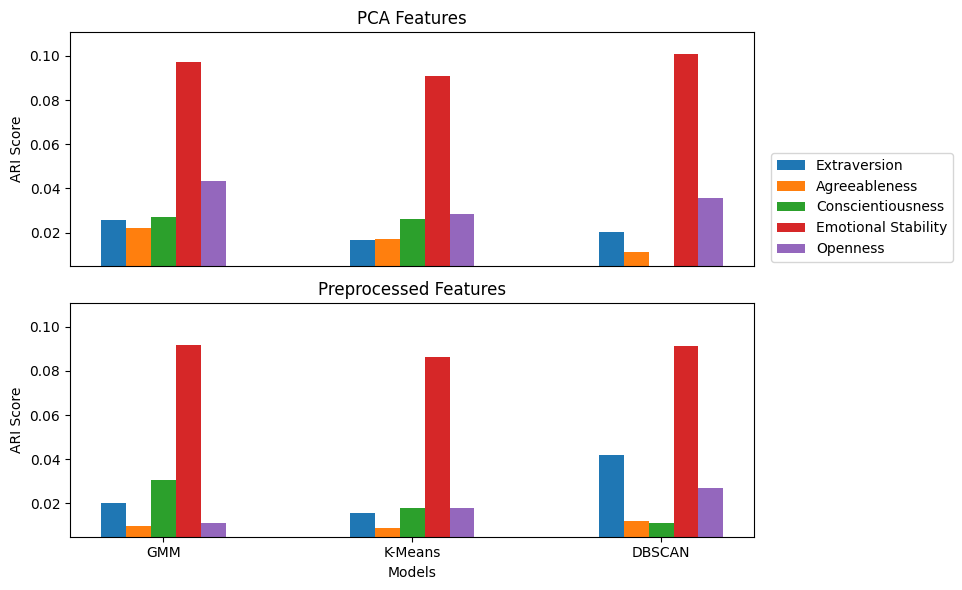

In [172]:
# Set the width of the bars
bar_width = 0.1

# Create an array for the x-axis positions
x = np.arange(len(models))

# Create a list of colors for bars

fig, ax = plt.subplots(2, 1,figsize=(10, 6))

y_min = min(min(min(metric_data[trait]) for trait in traits), min(min(metric_data_non_pca[trait]) for trait in traits)) 
y_max = max(max(max(metric_data[trait]) for trait in traits), max(max(metric_data_non_pca[trait]) for trait in traits)) + 0.01

for i, trait in enumerate(traits):
    ax[0].bar(x + i * bar_width, metric_data[trait], bar_width, label=trait)

# Set the labels, title, and legend
# ax[0].set_xlabel('Models')
ax[0].set_ylabel('ARI Score')
ax[0].set_xticks(x + bar_width * (len(traits) - 1) / 2)
ax[0].set_xticks([])
ax[0].set_ylim(y_min, y_max)
ax[0].legend(loc='center right', bbox_to_anchor=(1.3,0.25))
ax[0].set_title("PCA Features")

for i, trait in enumerate(traits):
    ax[1].bar(x + i * bar_width, metric_data_non_pca[trait], bar_width, label=trait)

# Set the labels, title, and legend
ax[1].set_xlabel('Models')
ax[1].set_ylabel('ARI Score')
ax[1].set_xticks(x + bar_width * (len(traits) - 1) / 2)
ax[1].set_xticklabels(model_names)
ax[1].set_ylim(y_min, y_max)
ax[1].set_title("Preprocessed Features")

plt.subplots_adjust(hspace=-0.2)

plt.tight_layout()
plt.savefig('figures/unsupervised_ari_plots.png')
plt.show()
